<a href="https://colab.research.google.com/github/reitezuz/18NES1-2026/blob/main/week02/rosenblatt_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Several variants of the Rosenblatt training algorithm

##1. Simple iterative Rosenblatt algorithm:



In [2]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights)
        self.bias = bias
        self.binary = binary

    def __str__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias}, binary={self.binary})"

    '''
    # works for a single value xi
    def activation(self, x):
        if self.binary:
            return 1 if x > 0 else 0 if x < 0 else 0.5
        else:
          return 1 if x > 0 else -1 if x < 0 else 0
    '''
    def activation(self, x): # works for a tensor (e.g., vector) of values x (or a single value)
        if self.binary:
            return np.where(x > 0, 1, np.where(x < 0, 0, 0.5))
        else:
            return np.where(x > 0, 1, np.where(x < 0, -1, 0))

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias
        return self.activation(potential)

    def rosenblatt(self, training_inputs, true_outputs, epochs=100):
        '''
        iterative rosenblatt training algorithm
        '''
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)
                self.weights += error * inputs
                self.bias += error
                errors += abs(error) # Accumulate the absolute errors

            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        print(f"The training ended after {epoch+1} epochs.")

def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

def perceptron_error(true_outputs, predicted_outputs):
    return np.sum(true_outputs != predicted_outputs)
    #return np.mean(true_outputs != predicted_outputs)

- train the perceptron on the given data:
- you can change the training data and perceptron parameters:

In [3]:
# Example 1a from the presentation:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])

# Perceptron parameters:
epochs = 100
weights = [0, 0]
bias = 0
binary = False

# Train the perceptron:
perceptron = Perceptron(weights, bias, binary)
perceptron.rosenblatt(inputs, true_outputs, epochs)

# Print summary:
print(perceptron)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


The training ended after 2 epochs.
Perceptron(weights=[-1 -1], bias=1, binary=False)
Perceptron error: 0


,Input,Predicted,True
0,"[-1, -1]",1,1
1,"[-1, 1]",1,1
2,"[1, -1]",1,1
3,"[1, 1]",-1,-1


## 1a. Rosenblatt training algorithm with visualization:

##### At first we define two useful function to visualize the data and the decision boundary:

In [4]:
def plot_decision_boundary_2D(perceptron, training_inputs, true_outputs):
    """Plots the decision boundary of the perceptron."""

    # Extract the first two columns of training_inputs
    x1 = training_inputs[:, 0]
    x2 = training_inputs[:, 1]

    # Generate points for visualization
    x = np.linspace(np.min(x1), np.max(x1), 100)
    y = -(perceptron.weights[0] * x + perceptron.bias) / perceptron.weights[1]

    # Plot the decision boundary
    plt.plot(x, y, label='Decision Boundary')

    # Plot the points (optional)
    vals = [0, 1] if perceptron.binary else [-1, 1]
    for i in vals:
        for j in vals:
            out = perceptron.forward(np.array([i, j]))
            if out == 1:
                plt.scatter(i, j, color='green')
            else:
                plt.scatter(i, j, color='red')

    plt.xlabel('x1', fontsize=12)
    plt.ylabel('x2', fontsize=12)
    plt.title('Perceptron Decision Boundary', fontsize=14)
    plt.grid(True)
    plt.legend()

    # Highlight x and y axes
    plt.axhline(0, color='black', linewidth=0.8)  # x-axis
    plt.axvline(0, color='black', linewidth=0.8)  # y-axis

    plt.show()

def plot_decision_boundary_3D(perceptron, training_inputs, true_outputs):
    """Plots the decision boundary of the perceptron in 3D."""
    # Select first three columns if more than three exist
    training_inputs = training_inputs[:, :3]

    # Check if the input data has 3 features
    if training_inputs.shape[1] != 3:
        raise ValueError("Input data must have at least 3 features for 3D visualization.")

    # Create a meshgrid of points
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1
    z_min, z_max = training_inputs[:, 2].min() - 1, training_inputs[:, 2].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                          np.arange(y_min, y_max, 0.1))

    # Calculate z values for the decision boundary
    zz = (-perceptron.weights[0] * xx - perceptron.weights[1] * yy - perceptron.bias) / perceptron.weights[2]

    # Create the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the decision boundary
    ax.plot_surface(xx, yy, zz, alpha=0.5)

    # Plot the training data points
    ax.scatter(training_inputs[:, 0], training_inputs[:, 1], training_inputs[:, 2],
                c=true_outputs, cmap=plt.cm.Paired)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    ax.set_title('Perceptron Decision Boundary (3D)')

    plt.show()

def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

def perceptron_error(true_outputs, predicted_outputs):
    return np.sum(true_outputs != predicted_outputs)
    #return np.mean(true_outputs != predicted_outputs)

##### We extend the iterative percepron algorithm with the visualization of weight and input vectors:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights)
        self.bias = bias
        self.binary = binary

    def __str__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias}, binary={self.binary})"

    def activation(self, x): # works for a tensor (e.g., vector) of values x (or a single value)
        if self.binary:
            return np.where(x > 0, 1, np.where(x < 0, 0, 0.5))
        else:
            return np.where(x > 0, 1, np.where(x < 0, -1, 0))

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias
        return self.activation(potential)

    def rosenblatt(self, training_inputs, true_outputs, epochs=100):
        '''
        iterative rosenblatt training algorithm
        '''
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)
                self.weights += error * inputs
                self.bias += error
                errors += abs(error) # Accumulate the absolute errors

            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        print(f"The training ended after {epoch+1} epochs.")
    def rosenblatt_visualize(self, training_inputs, true_outputs, epochs=100, do_plot=True):
        print("Rosenblatt iterative:")
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)

                if error != 0:
                    if do_plot:
                        # Visualization
                        plt.figure()
                        plt.title(f"Epoch {epoch}, Input: {inputs}, True output: {true_output}, Prediction: {prediction}, Weights: {self.weights} Bias: {self.bias}")
                        new_weights = self.weights + error * inputs
                        plt.quiver([0, 0], [0, 0], self.weights[0], self.weights[1], angles='xy', scale_units='xy', scale=1, color='r', label='Old weights')
                        plt.quiver([0, 0], [0, 0], inputs[0], inputs[1], angles='xy', scale_units='xy', scale=1, color='b', label='Inputs')
                        plt.quiver([0, 0], [0, 0], new_weights[0], new_weights[1], angles='xy', scale_units='xy', scale=1, color='y', label='New weights')
                        plt.xlim(-2, 2)
                        plt.ylim(-2, 2)
                        plt.xlabel("x1")
                        plt.ylabel("x2")
                        plt.legend()
                        plt.grid(True)
                        plt.show()
                    else:
                      print(f"Epoch {epoch}, Input: {inputs}, True output: {true_output}, Prediction: {prediction}, Weights: {self.weights} Bias: {self.bias}, New weights: {self.weights + error * inputs} New bias: {self.bias + error}")

                self.weights += error * inputs
                self.bias += error
                errors += abs(error) # Accumulate the absolute errors


            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        print(f"The training ended after {epoch} epochs.")


##### We run the Example 1a again:

Rosenblatt iterative:


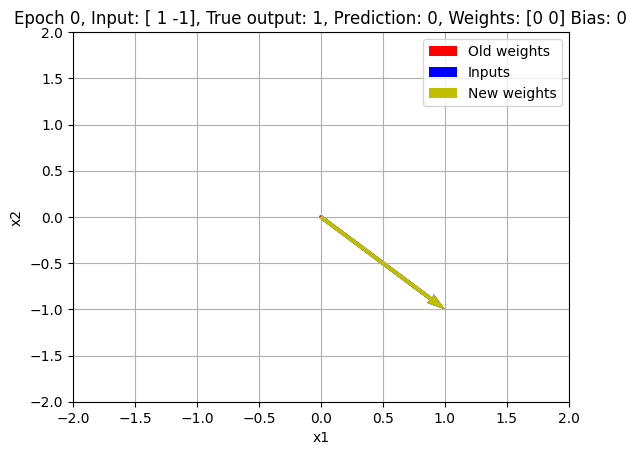

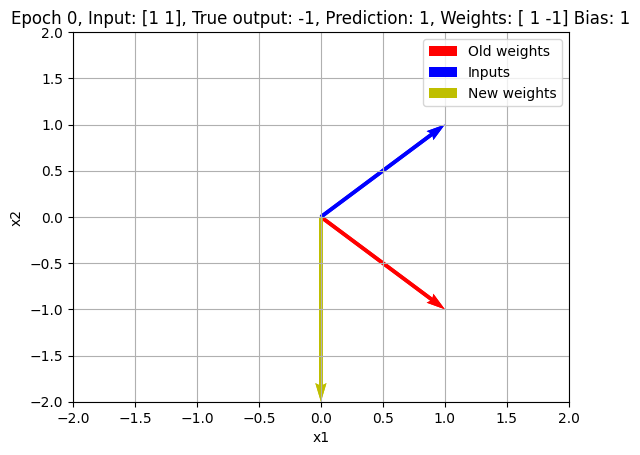

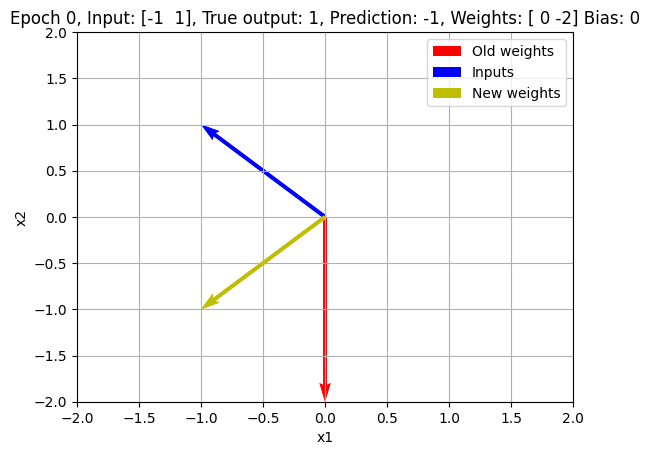

The training ended after 1 epochs.
Perceptron(weights=[-1 -1], bias=1, binary=False)
Perceptron error: 0


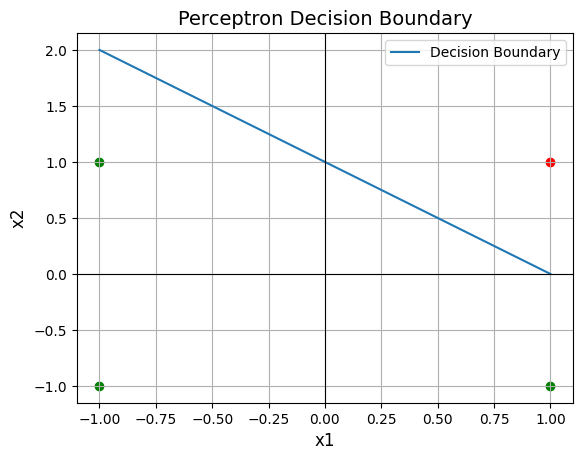

,Input,Predicted,True
0,"[-1, -1]",1,1
1,"[-1, 1]",1,1
2,"[1, -1]",1,1
3,"[1, 1]",-1,-1


In [ ]:
# Example 1a from the presentation:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])

# Perceptron parameters:
epochs = 10
weights = [0, 0]
bias = 0
binary = False

# Train the perceptron:
perceptron = Perceptron(weights, bias, binary)
perceptron.rosenblatt_visualize(inputs, true_outputs, epochs) #, do_plot=False)

# Print summary:
print(perceptron)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


Rosenblatt iterative:
Epoch 0, Input: [1 1], True output: -1, Prediction: 1, Weights: [0.1 0. ] Bias: 0, New weights: [-0.9 -1. ] New bias: -1
Epoch 0, Input: [-1 -1], True output: -1, Prediction: 1, Weights: [-0.9 -1. ] Bias: -1, New weights: [0.1 0. ] New bias: -2
Epoch 0, Input: [ 1 -1], True output: 1, Prediction: -1, Weights: [0.1 0. ] Bias: -2, New weights: [ 1.1 -1. ] New bias: -1
Epoch 0, Input: [-1  1], True output: 1, Prediction: -1, Weights: [ 1.1 -1. ] Bias: -1, New weights: [0.1 0. ] New bias: 0
Epoch 1, Input: [1 1], True output: -1, Prediction: 1, Weights: [0.1 0. ] Bias: 0, New weights: [-0.9 -1. ] New bias: -1
Epoch 1, Input: [-1 -1], True output: -1, Prediction: 1, Weights: [-0.9 -1. ] Bias: -1, New weights: [0.1 0. ] New bias: -2
Epoch 1, Input: [-1  1], True output: 1, Prediction: -1, Weights: [0.1 0. ] Bias: -2, New weights: [-0.9  1. ] New bias: -1
Epoch 1, Input: [ 1 -1], True output: 1, Prediction: -1, Weights: [-0.9  1. ] Bias: -1, New weights: [0.1 0. ] New bi

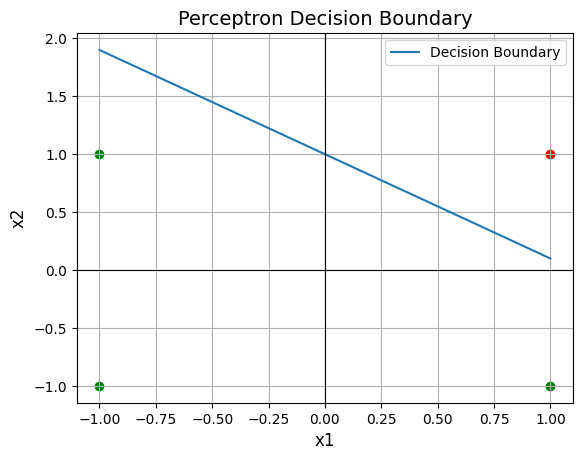

,Input,Predicted,True
0,"[-1, -1]",1,-1
1,"[-1, 1]",1,1
2,"[1, -1]",1,1
3,"[1, 1]",-1,-1


In [ ]:
# Example 1 XOR:
# Data:
inputs = np.array([ [-1, -1],
                    [-1,  1],
                    [ 1, -1],
                    [ 1,  1]])
true_outputs = np.array([-1, 1, 1, -1])

# Perceptron parameters:
epochs = 10
weights = [0.1, 0]
bias = 0
binary = False

# Train the perceptron:
perceptron = Perceptron(weights, bias, binary)
perceptron.rosenblatt_visualize(inputs, true_outputs, epochs, do_plot=False)

# Print summary:
print(perceptron)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


##2. Batch Rosenblatt Algorithm and the Hebbian training:


In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights)
        self.bias = bias
        self.binary = binary

    def __str__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias}, binary={self.binary})"

    def activation(self, x):
        if self.binary:
            return np.where(x > 0, 1, np.where(x < 0, 0, 0.5))
        else:
            return np.where(x > 0, 1, np.where(x < 0, -1, 0))

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias  #Corrected dot product
        return self.activation(potential)

    def rosenblatt_batch(self, training_inputs, true_outputs, epochs=100):
        if epochs > 1:
            print("Rosenblatt batch:")
        else:
            print("Hebbian")
        for epoch in range(epochs):
            predictions = self.forward(training_inputs)
            errors = sign(true_outputs - predictions)
            s = f"Epoch: {epoch} Weights: {self.weights} Bias: {self.bias} Error: {np.sum(np.abs(errors))} "
            # Batch update
            # self.weights += np.sum(errors * training_inputs, axis=0)
            self.weights += training_inputs.T @ errors # more efficient: transposition and matrix multiplication
            self.bias += np.sum(errors)

            print(s + f"Final weights: {self.weights} Final bias: {self.bias}")
            if np.sum(np.abs(errors)) == 0:
                break
        print(f"The training ended after {epoch+1} epochs.")

    def hebbian(self, training_inputs, true_outputs):
        return self.rosenblatt_batch(training_inputs, true_outputs, 1)


Rosenblatt batch:
Epoch: 0 Weights: [0 0] Bias: 0 Error: 4 Final weights: [-2 -2] Final bias: 2
Epoch: 1 Weights: [-2 -2] Bias: 2 Error: 0 Final weights: [-2 -2] Final bias: 2
The training ended after 2 epochs.
Perceptron(weights=[-2 -2], bias=2, binary=False)
Perceptron error: 0


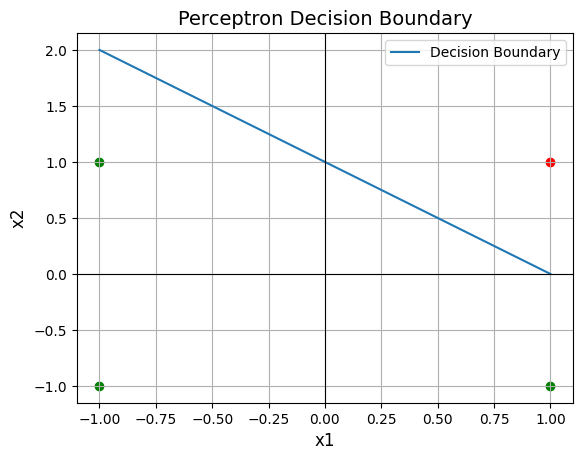

,Input,Predicted,True
0,"[-1, -1]",1,1
1,"[-1, 1]",1,1
2,"[1, -1]",1,1
3,"[1, 1]",-1,-1


In [ ]:
# Example 1a from the presentation -- Batch Rosenblatt:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])

# Perceptron parameters:
epochs = 10
weights = [0, 0]
bias = 0
binary = False

# Train the perceptron:
perceptron = Perceptron(weights, bias, binary)
perceptron.rosenblatt_batch(inputs, true_outputs, epochs)

# Print summary:
print(perceptron)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

Hebbian
Epoch: 0 Weights: [0 0] Bias: 0 Error: 4 Final weights: [-2 -2] Final bias: 2
The training ended after 1 epochs.
Perceptron(weights=[-2 -2], bias=2, binary=False)
Perceptron error: 0


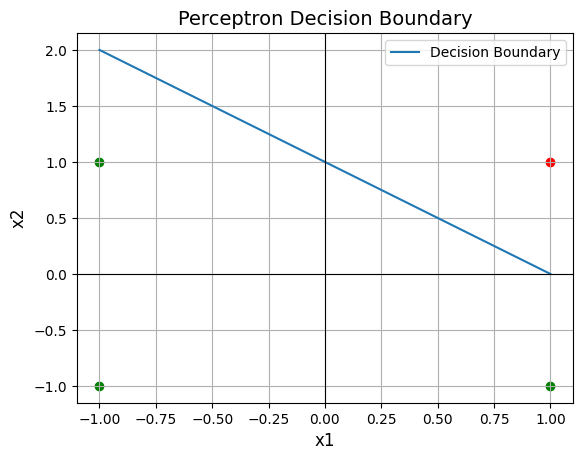

,Input,Predicted,True
0,"[-1, -1]",1,1
1,"[-1, 1]",1,1
2,"[1, -1]",1,1
3,"[1, 1]",-1,-1


In [ ]:
# Example 1a from the presentation -- Hebbian training:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])

# Perceptron parameters:
epochs = 10
weights = [0, 0]
bias = 0
binary = False

# Train the perceptron:
perceptron = Perceptron(weights, bias, binary)
perceptron.hebbian(inputs, true_outputs)

# Print summary:
print(perceptron)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

## 3. Rosenblatt algorithm with learning rate + Rosenblatt with best solution stored


In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights, dtype=float)
        self.bias = bias
        self.binary = binary

    def __str__(self):
        return f"Perceptron(weights={self.weights}, bias={self.bias}, binary={self.binary})"

    def activation(self, x):
        if self.binary:
            return np.where(x > 0, 1, np.where(x < 0, 0, 0.5))
        else:
            return np.where(x > 0, 1, np.where(x < 0, -1, 0))

    def forward(self, inputs):
        potential = np.dot(inputs, self.weights) + self.bias  #Corrected dot product
        return self.activation(potential)

    def rosenblatt_batch(self, training_inputs, true_outputs, learning_rate = 1, epochs=100):
        if epochs > 1:
            print("Rosenblatt batch:")
        else:
            print("Hebbian")
        for epoch in range(epochs):
            predictions = self.forward(training_inputs)
            errors = sign(true_outputs - predictions)

            # Batch update
            # self.weights += np.sum(errors * training_inputs, axis=0)
            self.weights += learning_rate * training_inputs.T @ errors # more efficient: transposition and matrix multiplication
            self.bias += learning_rate * np.sum(errors)

            print(f"Epoch: {epoch} Weights: {self.weights} Bias: {self.bias} {np.sum(np.abs(errors))}")
            if np.sum(np.abs(errors)) == 0:
                break
        print(f"The training ended after {epoch+1} epochs.")

    def hebbian(self, training_inputs, true_outputs):
        return self.rosenblatt_batch(training_inputs, true_outputs, 1)

    def rosenblatt_iterative(self, training_inputs, true_outputs, learning_rate = 1, epochs=100):
        print("Rosenblatt iterative:")
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)
                if (abs(error)):
                    print(f"Epoch: {epoch}, Inputs: {inputs}, Prediction: {prediction} Old weights: {self.weights} {self.bias} New weights: {self.weights+learning_rate*error*inputs} {self.bias+learning_rate*error}")
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error
                errors += abs(error) # Accumulate the absolute errors
            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        print(f"The training ended after {epoch+1} epochs.")
    def rosenblatt_iterative_best(self, training_inputs, true_outputs, learning_rate = 1, epochs=100, print_progress=True):
        print("Rosenblatt iterative + store best solution:")
        min_errors = float('inf')
        best_epoch = -1
        for epoch in range(epochs):

            # Shuffle the training data for each epoch
            shuffled_indices = np.random.permutation(len(training_inputs))
            training_inputs = training_inputs[shuffled_indices]
            true_outputs = true_outputs[shuffled_indices]

            errors = 0
            for inputs, true_output in zip(training_inputs, true_outputs):
                prediction = self.forward(inputs)
                error = sign(true_output - prediction)
                if (abs(error)) and print_progress:
                    print(f"Epoch: {epoch}, Inputs: {inputs}, Prediction: {prediction} Old weights: {self.weights} {self.bias} New weights: {self.weights+learning_rate*error*inputs} {self.bias+learning_rate*error}")
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error
                errors += abs(error) # Accumulate the absolute errors
            if errors < min_errors:
                min_errors = errors
                best_weights = self.weights.copy()
                best_bias = self.bias
                best_epoch = epoch
            if errors == 0: # Check if there were any errors in this epoch.
                break # End training if no errors were found
        self.weights = best_weights
        self.bias = best_bias
        print(f"The best solution found in {best_epoch+1} epochs with error {min_errors}.")
        print(f"The training ended after {epoch+1} epochs.")




Rosenblatt iterative:
Epoch: 0, Inputs: [1 1], Prediction: 0 Old weights: [0. 0.] 0 New weights: [-0.1 -0.1] -0.1
Epoch: 0, Inputs: [ 1 -1], Prediction: -1 Old weights: [-0.1 -0.1] -0.1 New weights: [ 0.  -0.2] 0.0
Epoch: 0, Inputs: [-1  1], Prediction: -1 Old weights: [ 0.  -0.2] 0.0 New weights: [-0.1 -0.1] 0.1
The training ended after 2 epochs.
Perceptron(weights=[-0.1 -0.1], bias=0.1, binary=False)
Perceptron error: 0


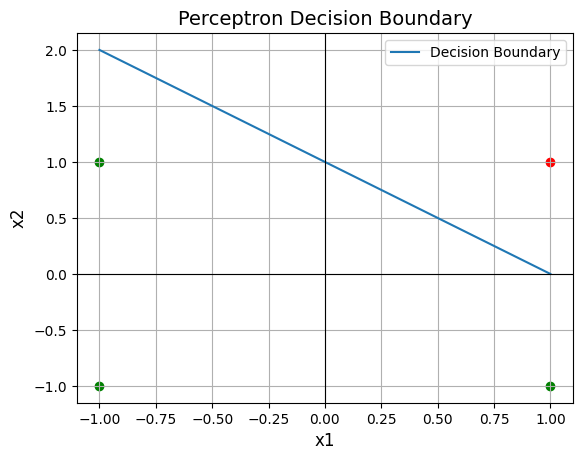

,Input,Predicted,True
0,"[-1, -1]",1,1
1,"[-1, 1]",1,1
2,"[1, -1]",1,1
3,"[1, 1]",-1,-1


In [ ]:
# Example 1a from the presentation -- Learning rate / Best solution:
# Data:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
true_outputs = np.array([1, 1, 1, -1])

# Perceptron parameters:
epochs = 10
weights = [0, 0]
bias = 0
binary = False
learning_rate = 0.1
best = False

# Train the perceptron:
perceptron = Perceptron(weights, bias, binary)
if best:
    perceptron.rosenblatt_iterative_best(inputs, true_outputs, learning_rate, epochs)
else:
    perceptron.rosenblatt_iterative(inputs, true_outputs, learning_rate, epochs)

# Print summary:
print(perceptron)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df


Rosenblatt iterative + store best solution:
Epoch: 0, Inputs: [1 1], Prediction: 1 Old weights: [0.2 0. ] 0 New weights: [ 0.1 -0.1] -0.1
Epoch: 0, Inputs: [-1  1], Prediction: -1 Old weights: [ 0.1 -0.1] -0.1 New weights: [0. 0.] 0.0
Epoch: 1, Inputs: [1 1], Prediction: 0 Old weights: [0. 0.] 0.0 New weights: [-0.1 -0.1] -0.1
Epoch: 1, Inputs: [-1 -1], Prediction: 1 Old weights: [-0.1 -0.1] -0.1 New weights: [0. 0.] -0.2
Epoch: 1, Inputs: [ 1 -1], Prediction: -1 Old weights: [0. 0.] -0.2 New weights: [ 0.1 -0.1] -0.1
Epoch: 1, Inputs: [-1  1], Prediction: -1 Old weights: [ 0.1 -0.1] -0.1 New weights: [0. 0.] 0.0
Epoch: 2, Inputs: [-1  1], Prediction: 0 Old weights: [0. 0.] 0.0 New weights: [-0.1  0.1] 0.1
Epoch: 2, Inputs: [1 1], Prediction: 1 Old weights: [-0.1  0.1] 0.1 New weights: [-0.2  0. ] 0.0
Epoch: 2, Inputs: [-1 -1], Prediction: 1 Old weights: [-0.2  0. ] 0.0 New weights: [-0.1  0.1] -0.1
Epoch: 2, Inputs: [ 1 -1], Prediction: -1 Old weights: [-0.1  0.1] -0.1 New weights: [0

<ipython-input-39-f875972b0c15>:10: RuntimeWarning: invalid value encountered in divide
  y = -(perceptron.weights[0] * x + perceptron.bias) / perceptron.weights[1]


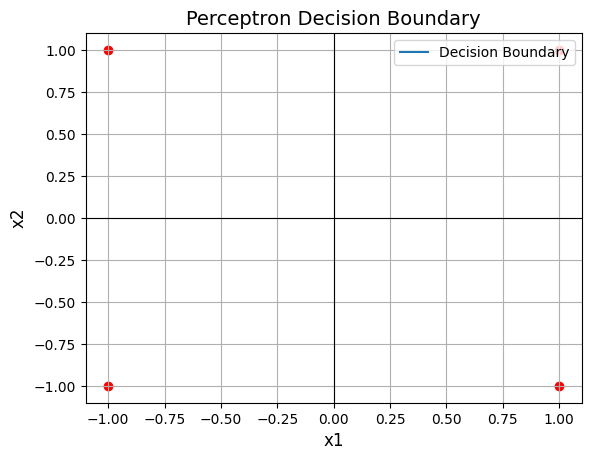

,Input,Predicted,True
0,"[-1, -1]",0,-1
1,"[-1, 1]",0,1
2,"[1, -1]",0,1
3,"[1, 1]",0,-1


In [ ]:
# Example 1 XOR - best solution stored:
# Data:
inputs = np.array([ [-1, -1],
                    [-1,  1],
                    [ 1, -1],
                    [ 1,  1]])
true_outputs = np.array([-1, 1, 1, -1])

# Perceptron parameters:
epochs = 10
weights = [0.2, 0]
bias = 0
binary = False
learning_rate = 0.1
best = True

# Train the perceptron:
perceptron = Perceptron(weights, bias, binary)
if best:
    perceptron.rosenblatt_iterative_best(inputs, true_outputs, learning_rate, epochs)
else:
    perceptron.rosenblatt_iterative(inputs, true_outputs, learning_rate, epochs)

# Print summary:
print(perceptron)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
plot_decision_boundary_2D(perceptron, inputs, true_outputs)

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}

df

